# **Activity 4: Language Modeling and Smoothing Techniques**


**Instructions:**

---
* Please download the provided IPython Notebook (ipynb) file and open it in Google Colab. Once opened, enter your code in the same file directly beneath the relevant question's code block.
* Insert a text block below your code to briefly explain it, mentioning any libraries or functions utilized. Conclude your activity with a comprehensive explanation of your overall approach in the final section of the notebook.

* Submit  
1. The IPython Notebook (ipynb) file.  
2. A PDF version of the notebook (converted from ipynb).

* The similarity score should be less than 15%


**What is Language Modeling?**

Language modeling (LM) is the use of various statistical and probabilistic techniques to determine the probability of a given sequence of words occurring in a sentence. Language models analyze bodies of text data to provide a basis for their word predictions. They are used in natural language processing (NLP) applications, particularly ones that generate text as an output.


**Language Models applications and use cases**
    Predictive text input systems (e.g. autocomplete, text suggestions).
    Speech recognition.
    Machine translation.
    Spelling correction.
    Natural Language Generation (NLG).
    Text summarization

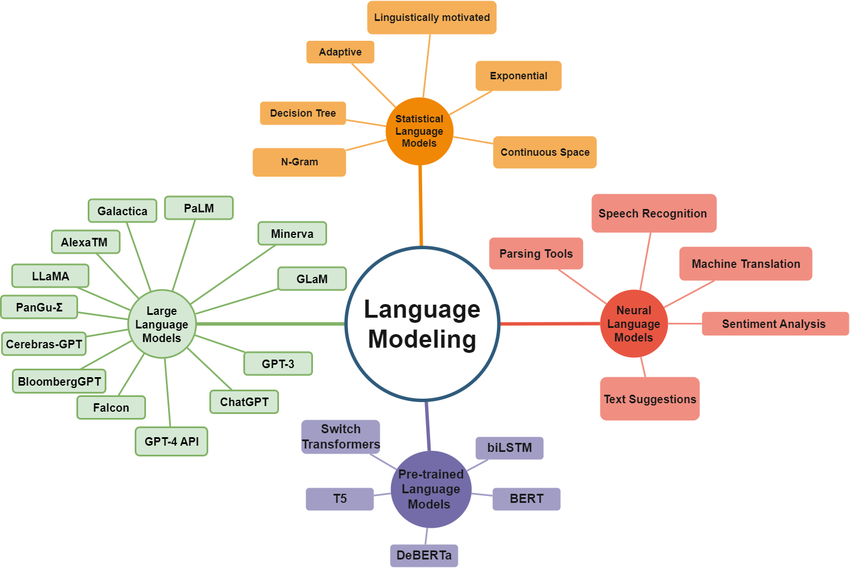




textblock - 1
###**Building an N-gram Language Model**
###An N-gram is a sequence of N tokens (or words).


Let’s understand N-gram with an example. Consider the following sentence:

**Example Text**: "I'm passionate about NLP because it empowers machines to understand and communicate with humans through language."


##**1-gram or unigram**

A unigram is the simplest form of n-gram, representing a single word in a sequence of text.
It is a standalone word or token without any consideration of adjacent words.

In [1]:
#Code-block 1
import nltk
nltk.download('punkt')

# Sentence to tokenize
sentence = "I am passionate about NLP because it empowers machines to understand and communicate with humans through language."

# Tokenize the sentence into unigrams
tokens = nltk.word_tokenize(sentence)

# Display the unigram tokens
for token in tokens:
    print(token)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


I
am
passionate
about
NLP
because
it
empowers
machines
to
understand
and
communicate
with
humans
through
language
.


- There are different types of n-graphs. The above example is of a 1-gram token which is also called as unigram. It splits the sentence into tokens as we have previously seen.
- These single tokens are called as unigrams.

##**2-gram or bigram**

A bigram consists of pairs of adjacent words or tokens in a sequence of text.
It provides context by considering two consecutive words together.

In [2]:
#Code-block 2

import nltk

# Sentence to tokenize
sentence = "I am passionate about NLP because it empowers machines to understand and communicate with humans through language."

# Tokenize the sentence into bigrams
tokens = nltk.word_tokenize(sentence)

# Create bigrams from the tokens
bigrams = list(nltk.bigrams(tokens))

# Display the bigram tokens
for bigram in bigrams:
    print(bigram)


('I', 'am')
('am', 'passionate')
('passionate', 'about')
('about', 'NLP')
('NLP', 'because')
('because', 'it')
('it', 'empowers')
('empowers', 'machines')
('machines', 'to')
('to', 'understand')
('understand', 'and')
('and', 'communicate')
('communicate', 'with')
('with', 'humans')
('humans', 'through')
('through', 'language')
('language', '.')


- In 2-gram there are 2 tokens combined, so it is known as 2-gram tokens.
- There are also 3-gram/trigram, etc exists.

#**Calculating bigram probabilities**

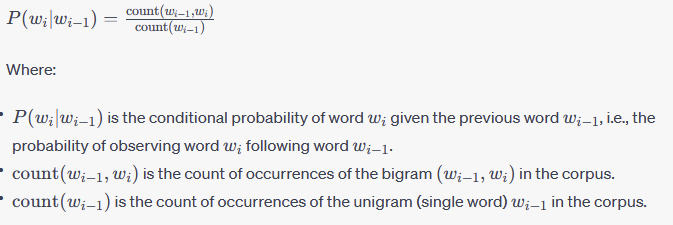

In [3]:
#Code-block 3

def readData():
    data = ['This is a dog', 'This is a cat', 'I love my cat', 'This is my name']
    dat = ' '.join(data).split()
    return dat

def createBigram(data):
    bigrams = [(data[i], data[i + 1]) for i in range(len(data) - 1)]
    return bigrams

def calcBigramProb(data, bigrams):
    bigramCounts = {}
    unigramCounts = {}

    for bigram in bigrams:
        word1, word2 = bigram
        bigramCounts[bigram] = bigramCounts.get(bigram, 0) + 1
        unigramCounts[word1] = unigramCounts.get(word1, 0) + 1

    bigramProb = {}
    for bigram in bigramCounts:
        word1, word2 = bigram
        bigramProb[bigram] = bigramCounts[bigram] / unigramCounts[word1]

    return bigramProb

if __name__ == '__main__':
    data = readData()
    bigrams = createBigram(data)

    print("\nAll the possible Bigrams are:")
    print(bigrams)

    bigramProb = calcBigramProb(data, bigrams)

    print("\nBigrams along with their probability:")
    print(bigramProb)

    inputList = "This is my cat"
    splt = inputList.split()
    outputProb = 1

    for i in range(len(splt) - 1):
        bigram = (splt[i], splt[i + 1])
        if bigram in bigramProb:
            outputProb *= bigramProb[bigram]
        else:
            outputProb = 0

    print('\nProbability of sentence "This is my cat" =', outputProb)



All the possible Bigrams are:
[('This', 'is'), ('is', 'a'), ('a', 'dog'), ('dog', 'This'), ('This', 'is'), ('is', 'a'), ('a', 'cat'), ('cat', 'I'), ('I', 'love'), ('love', 'my'), ('my', 'cat'), ('cat', 'This'), ('This', 'is'), ('is', 'my'), ('my', 'name')]

Bigrams along with their probability:
{('This', 'is'): 1.0, ('is', 'a'): 0.6666666666666666, ('a', 'dog'): 0.5, ('dog', 'This'): 1.0, ('a', 'cat'): 0.5, ('cat', 'I'): 0.5, ('I', 'love'): 1.0, ('love', 'my'): 1.0, ('my', 'cat'): 0.5, ('cat', 'This'): 0.5, ('is', 'my'): 0.3333333333333333, ('my', 'name'): 0.5}

Probability of sentence "This is my cat" = 0.16666666666666666


##**Question 1:**

###    data = ['I love machine learning', 'Machine learning is fun ', 'Learning algorithms are important', 'Algorithms are the foundation of AI and it is fun', 'machine learning is important', 'Algorithms is fun', 'AI is fun and important']


###**Change the data in the above code and calculate the probability of inputlist given below?**

###inputList = 'Machine learning is fun and important'

In [4]:
#code here
#Code-block 3

def readData():
    data = ['I love machine learning', 'Machine learning is fun ', 'Learning algorithms are important', 'Algorithms are the foundation of AI and it is fun', 'machine learning is important', 'Algorithms is fun', 'AI is fun and important']
    dat = ' '.join(data).split()
    return dat

def createBigram(data):
    bigrams = [(data[i], data[i + 1]) for i in range(len(data) - 1)]
    return bigrams

def calcBigramProb(data, bigrams):
    bigramCounts = {}
    unigramCounts = {}

    for bigram in bigrams:
        word1, word2 = bigram
        bigramCounts[bigram] = bigramCounts.get(bigram, 0) + 1
        unigramCounts[word1] = unigramCounts.get(word1, 0) + 1

    bigramProb = {}
    for bigram in bigramCounts:
        word1, word2 = bigram
        bigramProb[bigram] = bigramCounts[bigram] / unigramCounts[word1]

    return bigramProb

if __name__ == '__main__':
    data = readData()
    bigrams = createBigram(data)

    print("\nAll the possible Bigrams are:")
    print(bigrams)

    bigramProb = calcBigramProb(data, bigrams)

    print("\nBigrams along with their probability:")
    print(bigramProb)

    inputList = "Machine learning is fun and important"
    splt = inputList.split()
    outputProb = 1

    for i in range(len(splt) - 1):
        bigram = (splt[i], splt[i + 1])
        if bigram in bigramProb:
            outputProb *= bigramProb[bigram]
        else:
            outputProb = 0

    print('\nProbability of sentence "This is my cat" =', outputProb)



All the possible Bigrams are:
[('I', 'love'), ('love', 'machine'), ('machine', 'learning'), ('learning', 'Machine'), ('Machine', 'learning'), ('learning', 'is'), ('is', 'fun'), ('fun', 'Learning'), ('Learning', 'algorithms'), ('algorithms', 'are'), ('are', 'important'), ('important', 'Algorithms'), ('Algorithms', 'are'), ('are', 'the'), ('the', 'foundation'), ('foundation', 'of'), ('of', 'AI'), ('AI', 'and'), ('and', 'it'), ('it', 'is'), ('is', 'fun'), ('fun', 'machine'), ('machine', 'learning'), ('learning', 'is'), ('is', 'important'), ('important', 'Algorithms'), ('Algorithms', 'is'), ('is', 'fun'), ('fun', 'AI'), ('AI', 'is'), ('is', 'fun'), ('fun', 'and'), ('and', 'important')]

Bigrams along with their probability:
{('I', 'love'): 1.0, ('love', 'machine'): 1.0, ('machine', 'learning'): 1.0, ('learning', 'Machine'): 0.3333333333333333, ('Machine', 'learning'): 1.0, ('learning', 'is'): 0.6666666666666666, ('is', 'fun'): 0.8, ('fun', 'Learning'): 0.25, ('Learning', 'algorithms'): 1.

- For the above question I have taken the code from code block - 3 and replaced the data and the input to the given information.
- Now let us decode the above code part by part.
- The readData() method takes the data as a string and splits it into individual words.
- createBigram() function takes the list as input and converts it into Bigrams/2-gram, and returns it.
- calculateBigramProbab() funtion takes the data and Bigram as input at calculates the Bigram propabilities using the formulae discuss above. The probabilities help us estimate how likely it is to get the second word from the given first word.

##**Building a Basic Language Model**

###Now that we understand what an N-gram is, let’s build a basic language model using trigrams of the Reuters corpus.

###Reuters corpus is a collection of 10,788 news documents totaling 1.3 million words. We can build a language model in a few lines of code using the NLTK package:

In [5]:
#Code-block 4

#CODE HERE
from nltk.corpus import reuters
from nltk import bigrams, trigrams
from collections import Counter, defaultdict
nltk.download('reuters')

# Create a placeholder for model
model = defaultdict(lambda: defaultdict(lambda: 0)) #Lambda functions are particularly useful for short, simple operations, but for more complex or reusable functions

# Count frequency of co-occurance
for sentence in reuters.sents():
    for w1, w2, w3 in trigrams(sentence, pad_right=True, pad_left=True):
        model[(w1, w2)][w3] += 1

# Let's transform the counts to probabilities
for w1_w2 in model:
    total_count = float(sum(model[w1_w2].values()))
    for w3 in model[w1_w2]:
        model[w1_w2][w3] /= total_count

[nltk_data] Downloading package reuters to /root/nltk_data...


- The above is an example to show how language modeling works.
- In the above example we have taken 'Reuters'
- T the model calculates the probabilities and predicts the likelihood of the change of the second word to occur given the first word.
- For the above example we have taken trigram.
- We calculated the probabilities and added up to get the total probability.

In [6]:
print(dict(model["today", "the",]))

{'public': 0.05555555555555555, 'European': 0.05555555555555555, 'Bank': 0.05555555555555555, 'price': 0.1111111111111111, 'emirate': 0.05555555555555555, 'overseas': 0.05555555555555555, 'newspaper': 0.05555555555555555, 'company': 0.16666666666666666, 'Turkish': 0.05555555555555555, 'increase': 0.05555555555555555, 'options': 0.05555555555555555, 'Higher': 0.05555555555555555, 'pound': 0.05555555555555555, 'Italian': 0.05555555555555555, 'time': 0.05555555555555555}


- Given 'today' and 'the' the above model is predicting what could be the next word based on 'reuters'.
- From the output we can observe that the highest probability is for the word 'company'.
- That means the next word which is more likely to occur is 'company'.

##**Smoothing Techniques**
Smoothing techniques in natural language processing (NLP) are used to address the problem of zero probabilities or low probabilities in language models, particularly in the context of probabilistic models like n-grams or when dealing with sparse data. Smoothing helps prevent issues like `zero probability estimates`, which can cause problems in statistical language models, such as perplexity and poor generalization.

> There are several smoothing techniques they are:
- Laplacian (add-one) Smoothing
- Lidstone (add-k) Smoothing
- Interpolation
- Katz Backoff
- Kneser-Ney Smoothing
- Absolute Discounting

In [7]:
#code block 5
#BIGRAM MODEL
from collections import defaultdict
from collections import Counter
from numpy.random import choice
from tqdm import tqdm

class Bigram():
    def __init__(self):
        self.bigram_counts = defaultdict(Counter)
        self.unigram_counts = Counter()
        self.context = defaultdict(Counter)
        self.start_count = 0
        self.token_count = 0
        self.vocab_count = 0

    def convert_sentence(self, sentence):
        return ["<s>"] + [w.lower() for w in sentence] + ["</s>"]

    def get_counts(self, sentences):
        # collect unigram counts
        for sentence in sentences:
            sentence = self.convert_sentence(sentence)
            for word in sentence[1:]:  # from 1, because we don't need the <s> token
                self.unigram_counts[word] += 1
            self.start_count += 1

        # collect bigram counts
        for sentence in sentences:
            sentence = self.convert_sentence(sentence)
            bigram_list = zip(sentence[:-1], sentence[1:])
            for bigram in bigram_list:
                self.bigram_counts[bigram[0]][bigram[1]] += 1
                self.context[bigram[1]][bigram[0]] += 1
        self.token_count = sum(self.unigram_counts.values())
        self.vocab_count = len(self.unigram_counts.keys())

    def generate_sentence(self):
        current_word = "<s>"
        sentence = [current_word]
        while current_word != "</s>":
            prev_word = current_word
            prev_word_counts = self.bigram_counts[prev_word]
            # obtain bigram probability distribution given the previous word
            bigram_probs = []
            total_counts = float(sum(prev_word_counts.values()))
            for word in prev_word_counts:
                bigram_probs.append(prev_word_counts[word] / total_counts)
            # sample the next word
            current_word = choice(list(prev_word_counts.keys()), p=bigram_probs)
            sentence.append(current_word)

        sentence = " ".join(sentence[1:-1])
        return sentence

- Smoothing techniques are used to avoid zero probability which can reduce the model efficiency when new or unseen words occur in the input while working with a huge dataset.

Now, let's use perplexity to evaluate different smoothing techniques at the level of the corpus. For this, we'll divide Brown corpus up randomly into a training set and a test set based on an 80/20 split. The perplexity can be calculated as follow:

##**Perplexity**
Perplexity is a measurement used to evaluate language models in natural language processing. It indicates how well a probability model predicts a sample.The lower the perplexity better the training.

We need perplexity because it provides:

* A numerical way to evaluate and compare different language models.
* A measure that accounts for both accuracy and complexity of the model. More accurate but complex models are penalized.
* An indication of how well the model generalizes to new data. Lower perplexity suggests better generalization.
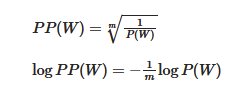

In [8]:
import nltk
from nltk.corpus import brown
from tqdm import tqdm

nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [9]:
#code block 6

import math
from random import shuffle

def split_train_test():
    sents = list(brown.sents())
    shuffle(sents)
    cutoff = int(0.8*len(sents))
    training_set = sents[:cutoff]
    test_set = [[word.lower() for word in sent] for sent in sents[cutoff:]]
    return training_set, test_set

def calculate_perplexity(sentences, bigram, smoothing_function, parameter):
    total_log_prob = 0
    test_token_count = 0
    for sentence in tqdm(sentences):
        test_token_count += len(sentence) + 1 # have to consider the end token
        total_log_prob += smoothing_function(sentence, bigram, parameter)
    return math.exp(-total_log_prob / test_token_count)

training_set, test_set = split_train_test()

##**Laplace (Add-One) Smoothing**:

* In Laplace smoothing, also known as add-one smoothing, a count of 1 is added to every possible outcome for each event in the dataset.

* This ensures that no probability estimate is zero and avoids overfitting to the training data.

* The formula for Laplace smoothing is:


 `P(w | context) = (Count(w, context) + 1) / (Count(context) + |Vocabulary|)`

 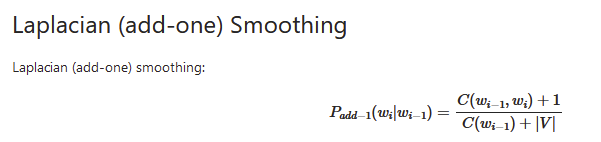

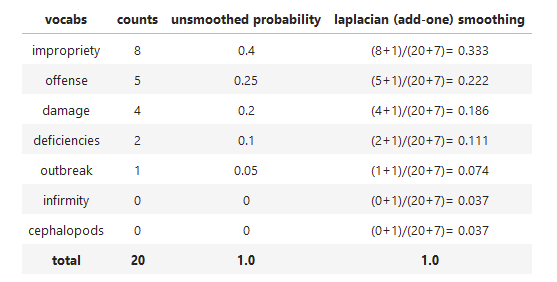

- Leplace smoothing adds 1 to the count to avoid zero probability.
- If we do not add 1, the probability of 'infirmity' and 'cephalopods' will become 0, which finally will reduce the performance and efficiency of the model.

In [10]:
#code block 7

def laplacian_smoothing(sentence, bigram, parameter):
    sentence = bigram.convert_sentence(sentence)
    bigram_list = zip(sentence[:-1], sentence[1:])
    prob = 0
    for prev_word, word in bigram_list:
        sm_bigram_counts = bigram.bigram_counts[prev_word][word] + 1
        if prev_word == "<s>": sm_unigram_counts = bigram.start_count
        else: sm_unigram_counts = bigram.unigram_counts[prev_word] + len(bigram.unigram_counts)
        prob += math.log(sm_bigram_counts / sm_unigram_counts)
    return prob

bigram_laplacian_smoothing = Bigram()
bigram_laplacian_smoothing.get_counts(training_set)
plex_laplacian_smoothing = calculate_perplexity(test_set, bigram_laplacian_smoothing, laplacian_smoothing, None)
print()
print(plex_laplacian_smoothing)

100%|██████████| 11468/11468 [00:00<00:00, 17975.82it/s]


3462.3589179120445


- The above bigram, takes the 'brown' dataset and calculates its perplexity, by splitting the data into test data (20%) and training data (80%) as seen in code block-6.
- And the perplexity is 3462.359.

##**Question 2:**
###Based on the above Laplacian Smoothing code block implement your own list of test_set with few sentences as corpus and calculate the perplexity after applying the Laplacian Smoothing?

In [11]:
#code here

test_set = [
    "the dog barked loudly",
    "a bird chirped in the tree",
    "the quick brown fox jumps over the lazy dog",
    "the cat sat on the mat",
    "this is a sample sentence for testing",
    "Happy New Year",
    "Many many happy returns of the day",
    "Jack and Olly are friends."
]

bigram_laplacian_smoothing = Bigram()
bigram_laplacian_smoothing.get_counts(training_set)
plex_laplacian_smoothing = calculate_perplexity(test_set, bigram_laplacian_smoothing, laplacian_smoothing, None)
print()
print(plex_laplacian_smoothing)


100%|██████████| 8/8 [00:00<00:00, 4487.09it/s]


42180.055452044304


In [13]:
# Previous test set
training_set, test_set = split_train_test()

- For the above question, I have taken few sentences as the test_set and calculated the perplexity and the value is 42180 which is very high.

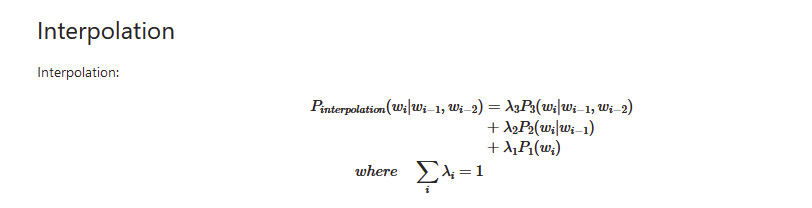

- Interpolation means adding all the estimates from differnt n-grams including some weights which are denoted as lambda 1, lambda 2, etc

In [14]:
#code block 8

def interpolation(sentence, bigram, lambdas):
    bigram_lambda = lambdas[0]
    unigram_lambda = lambdas[1]
    zerogram_lambda = 1 - lambdas[0] - lambdas[1]

    sentence = bigram.convert_sentence(sentence)
    bigram_list = zip(sentence[:-1], sentence[1:])
    prob = 0

    for prev_word, word in bigram_list:
        # bigram probability
        sm_bigram_counts = bigram.bigram_counts[prev_word][word]
        if sm_bigram_counts == 0: interp_bigram_counts = 0
        else:
            if prev_word == "<s>": u_counts = bigram.start_count
            else: u_counts = bigram.unigram_counts[prev_word]
            interp_bigram_counts = sm_bigram_counts / float(u_counts) * bigram_lambda

        # unigram probability
        interp_unigram_counts = (bigram.unigram_counts[word] / bigram.token_count) * unigram_lambda

        # "zerogram" probability: this is to account for out-of-vocabulary words, this is just 1 / |V|
        vocab_size = len(bigram.unigram_counts)
        interp_zerogram_counts = (1 / float(vocab_size)) * zerogram_lambda

        prob += math.log(interp_bigram_counts + interp_unigram_counts + interp_zerogram_counts)
    return prob

bigram_interpolation = Bigram()
bigram_interpolation.get_counts(training_set)
plex_interpolation = calculate_perplexity(test_set, bigram_interpolation, interpolation, (0.8, 0.19))
print()
print(plex_interpolation)

100%|██████████| 11468/11468 [00:01<00:00, 10111.44it/s]


437.38243947158145


- First, we initialize the unigram, bigram, and trigram along with the weights. And calculated the probabilities by adding them.
- We have used the same data. It basically, compares all the smoothing techniques.
- For the above interpolation we have the perplexity as 437.38.

##**Question 3:**
###Create a Unigram class and develop a Unigram model using the Brown corpus, inspired by the previously discussed Bigram model. Then, assess its performance by calculating its perplexity and comparing the results with those of the Bigram model.

In [15]:
#code here
from collections import Counter

class Unigram:
    def __init__(self):
        self.unigram_counts = Counter()
        self.token_count = 0
        self.vocab_count = 0

    def convert_sentence(self, sentence):
        return [w.lower() for w in sentence]

    def get_counts(self, sentences):
        for sentence in sentences:
            sentence = self.convert_sentence(sentence)
            for word in sentence:
                self.unigram_counts[word] += 1
                self.token_count += 1
        self.vocab_count = len(self.unigram_counts)

    def calculate_probability(self, word):
        if word in self.unigram_counts:
            return self.unigram_counts[word] / self.token_count
        else:
            # Handling out-of-vocabulary words with a very small probability
            return 1 / (self.token_count * 100)


In [16]:
import nltk
import math

# Download the Brown corpus
nltk.download('brown')
from nltk.corpus import brown

# Split the Brown corpus into training and test sets
sents = brown.sents()
cutoff = int(0.8 * len(sents))
training_set_unigram = [sentence for sentence in sents[:cutoff]]
test_set_unigram = [sentence for sentence in sents[cutoff:]]

# Create and train the Unigram model
unigram_model = Unigram()
unigram_model.get_counts(training_set_unigram)

# Calculate perplexity using the Unigram model
total_log_prob_unigram = 0
test_token_count_unigram = 0
for sentence in test_set_unigram:
    test_token_count_unigram += len(sentence)
    for word in sentence:
        prob = unigram_model.calculate_probability(word)
        total_log_prob_unigram += math.log(prob)

plex_unigram = math.exp(-total_log_prob_unigram / test_token_count_unigram)
print("Perplexity of Unigram model:", plex_unigram)


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


Perplexity of Unigram model: 3309.308188711118


- I have defined the class called Unigram similar to the Bigram class with a different logic. In unigram, the tokens are divided into 1-word tokens.
- Then we calculated the perplexity of the model.
- The perplexity for the unigram model is 3309.3.

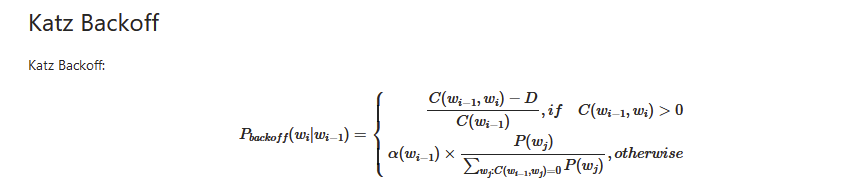

In [17]:
#code block 9

def backoff(sentence, bigram, d):
    sentence = bigram.convert_sentence(sentence)
    bigram_list = zip(sentence[:-1], sentence[1:])
    prob = 0

    for prev_word, word in bigram_list:
        sm_bigram_counts = bigram.bigram_counts[prev_word][word]
        if prev_word == "<s>": sm_unigram_counts = bigram.start_count
        else: sm_unigram_counts = bigram.unigram_counts[prev_word]
        if sm_unigram_counts == 0:
            prob += math.log((1 / float(bigram.vocab_count)) * 0.01)
            continue
        if sm_bigram_counts != 0:
            sm_bigram_counts = sm_bigram_counts - d
        else:
            alpha_prev_word = len(bigram.bigram_counts[prev_word].keys())
            # sum unigram counts of word j which do not appear after pre_word
            unseen_unigram_sum = 0
            for vocab in bigram.unigram_counts.keys():
                if vocab not in bigram.bigram_counts[prev_word].keys():
                    unseen_unigram_sum += bigram.unigram_counts[vocab]
            unseen_unigram = bigram.unigram_counts[word] / unseen_unigram_sum
            if unseen_unigram == 0: unseen_unigram = 1 / float(bigram.vocab_count - alpha_prev_word)
            sm_bigram_counts = alpha_prev_word * d * unseen_unigram
        prob += math.log(sm_bigram_counts / sm_unigram_counts)
    return prob

bigram_backoff = Bigram()
bigram_backoff.get_counts(training_set)
plex_backoff = calculate_perplexity(test_set, bigram_backoff, backoff, 0.1)
print(plex_backoff)

100%|██████████| 11468/11468 [21:28<00:00,  8.90it/s]

592.2649998231972


###**Question 4:**

##Summarize the adjustments you made and insights gained from this activity.

Explanation:
All the adjustments are already specified below each code block.

Below is my understanding of this activity.

For this language modeling, we aim to predict the next words based on the previous patterns. For that, the first thing we do is split the sentence into n-gram tokens which can be 1-gram, 2-gram, etc based on the requirement and based on the dataset that is used. The next step is to calculate the bigram probabilities using the formulae. The propability tells how likely is the second word going to occur gievn the first word.

Smoothing Techniques can be understood as, which working with a dataset that is huge, there can be some input words that are new and are not in the dataset. In that case we add some amount of propabilites to those new/unseen words, becasue for the unseen word the propabiliy will get zero which can decrese the overall performance of the model. To avoid that we use smoothing techniques.
There are several smoothing teechiques that can be used based on requirnments.

Perplexity is used to calculate the efficiency of the model. Low perplexity means high accuracy and vice versa. That means Perplexity and accuracy are inversely proportional.

Laplace Smoothing: replace smoothing by adding a constant 1 to the count in case of an unseen word. That is the reason it is also called add-one smoothing.
Smoothing techniques can be implemented for all types of n-grams which are 1-gram, bigram, trigram, etc.

Interpolation is nothing but combinning the values of estimations from different n-grams like unigram, bigram, trigram, etc and also including the weigths for each n-gram.

